In [ ]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.


In [ ]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.1 MB/s eta 0:00:00


In [ ]:
import keras
print(keras.__version__)

3.0.5


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation = 1
Fitness    = 1.9205541269214434
Generation = 2
Fitness    = 1.9205541269214434
Generation = 3
Fitness    = 2.1848342692841847
Generation = 4
Fitness    = 2.1848342692841847
Generation = 5
Fitness    = 2.408434940208599
Generation = 6
Fitness    = 2.4674876007325266
Generation = 7
Fitness    = 2.585951983810495
Generation = 8
Fitness    = 2.7946238589283467
Generation = 9
Fitness    = 3.5526138605789646
Generation = 10
Fitness    = 3.8665561706580895
Generation = 11
Fitness    = 4.985028737726645
Generation = 12
Fitness    = 4.985028737726645
Generation = 13
Fitness    = 5.052032117470409
Generation = 14
Fitness    = 5.200045973674056
Generation = 15
Fitness    = 5.753880474725595
Generation = 16
Fitness    = 6.711373866487418
Generation = 17
Fitness    = 6.8710592626811575
Generation = 18
Fitness    = 10.063874259602187
Generation = 19
Fitness    = 10.063874259602187
Generation = 20
Fitness    = 11.218880216165967
Generation = 21
Fitness    = 11.218880216165967
Generatio

Fitness    = 7739380.763515218
Stopping early due to lack of improvement.


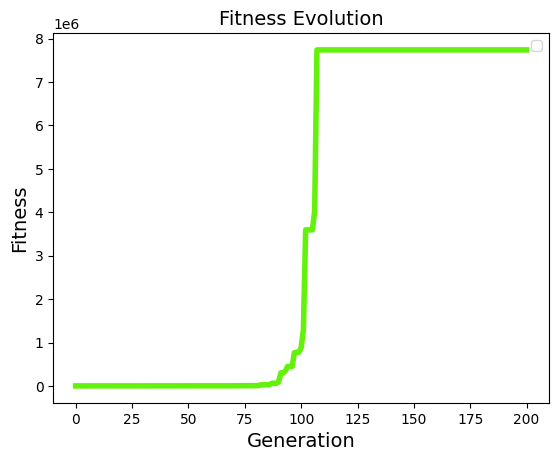

Best Fitness: 7739380.763515218
Best Solution Index: 0
Predictions:
[[1.0000000e+00 2.3234287e-08]
 [1.3747472e-11 1.0000000e+00]
 [2.4629969e-22 1.0000000e+00]
 [1.0000000e+00 9.4765156e-09]]
Crossentropy Loss: 1.192093e-07
Model Accuracy: 1.0
[array([[-7.29260329,  6.37755817, -2.31631866, -0.14540028],
       [ 4.81178216, -7.71485941,  4.08579291,  0.2815448 ]]), array([-1.07567367, -0.35969691, -1.42715861,  2.79960323]), array([[-7.00547248,  5.6856117 ],
       [-7.43096919,  3.69133582],
       [ 0.27536305, -1.24861577],
       [ 1.92976453, -0.82562848]]), array([ 5.8421343 , -4.02149466])]


In [ ]:
import keras
import pygad
import numpy as np

def evaluate_solution(ga_engine, solution_vector, index):
    global inputs, targets, ga_keras, nn_model

    pred = pygad.kerasga.predict(model=nn_model,
                                 solution=solution_vector,
                                 data=inputs)

    loss_function = keras.losses.BinaryCrossentropy()
    fitness_score = 1.0 / (loss_function(targets, pred).numpy() + 1e-8)

    return fitness_score


def generation_callback(ga_instance):
    print(f"Generation = {ga_instance.generations_completed}")
    current_fitness = ga_instance.best_solution()[1]
    print(f"Fitness    = {current_fitness}")


# Constructing the neural network model
input_node = keras.layers.Input(shape=(2,))
hidden_layer = keras.layers.Dense(4, activation="relu")(input_node)
output_node = keras.layers.Dense(2, activation="softmax")(hidden_layer)

nn_model = keras.Model(inputs=input_node, outputs=output_node)



# Data for XOR problem
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

targets = np.array([[1, 0],
                    [0, 1],
                    [0, 1],
                    [1, 0]])

# Configuration for PyGAD
# Setting up PyGAD with Keras
ga_keras = pygad.kerasga.KerasGA(model=nn_model,
                                 num_solutions=10)
generations = 200
parents_mating = 5
initial_pop_weights = ga_keras.population_weights

# Initializing PyGAD instance
ga_optimizer = pygad.GA(num_generations=generations,
                        num_parents_mating=parents_mating,
                        initial_population=initial_pop_weights,
                        fitness_func=evaluate_solution,
                        on_generation=generation_callback)

# Running the optimization
ga_optimizer.run()

# Plotting the fitness evolution
ga_optimizer.plot_fitness(title="Fitness Evolution", linewidth=4)

# Best solution details
best_solution, best_fitness, best_index = ga_optimizer.best_solution()
print(f"Best Fitness: {best_fitness}")
print(f"Best Solution Index: {best_index}")

# Making predictions using the best solution
best_predictions = pygad.kerasga.predict(model=nn_model,
                                         solution=best_solution,
                                         data=inputs)
print(f"Predictions:\n{best_predictions}")

# Evaluating the best model
crossentropy = keras.losses.BinaryCrossentropy()
print("Crossentropy Loss:", crossentropy(targets, best_predictions).numpy())

# Accuracy of the model
accuracy_metric = keras.metrics.BinaryAccuracy()
accuracy_metric.update_state(targets, best_predictions)
print(f"Model Accuracy: {accuracy_metric.result().numpy()}")

print(pygad.kerasga.model_weights_as_matrix(model=model, weights_vector=best_solution))
